# Dataset Presentation

The dataset we will use for this exercise is the "Data Science Salaries" dataset. The dataset is designed to provide insight into the salaries of data science professionals across different roles, experience levels, and locations. You can find the dataset at the provided directory: `../datasets/salaries.csv`.

**Features of the Dataset:**

1. **work_year:** The year in which the data was collected (2024).
2. **experience_level:** The experience level of the employee, categorized as SE (Senior Engineer), MI (Mid-Level Engineer), or EL (Entry-Level Engineer).
3. **employment_type:** The type of employment, such as full-time (FT), part-time (PT), contract (C), or freelance (F).
4. **job_title:** The title or role of the employee within the company, for example, AI Engineer.
5. **salary:** The salary of the employee in the local currency (e.g., 202,730 USD).
6. **salary_currency:** The currency in which the salary is denominated (e.g., USD).
7. **salary_in_usd:** The salary converted to US dollars for standardization purposes.
8. **employee_residence:** The country of residence of the employee.
9. **remote_ratio:** The ratio indicating the extent of remote work allowed in the position (0 for no remote work, 1 for fully remote).
10. **company_location:** The location of the company where the employee is employed.
11. **company_size:** The size of the company, often categorized by the number of employees (S for small, M for medium, L for large).

#### Problem Definition

**Objective:**
We aim to predict the salary of data science professionals (`salary_in_usd`) based on various features like experience level, employment type, job title, employee residence, remote ratio, company location, and company size.

**Why This Problem is Interesting:**
Predicting salaries based on various features can be valuable for several reasons:
- **For Employers:** Helps in determining competitive salary offers to attract talent.
- **For Job Seekers:** Provides insights into what salary to expect based on their profile and location.
- **For Analysts:** Understanding salary trends in the data science industry can aid in economic and market analyses.

# Workflow

We embarked on a series of steps to enhance prediction accuracy using regression models. The preprocessing phase remained consistent throughout, involving StandardScaler for numerical data and OneHotEncoder for categorical features. Initially, we evaluated models with R2 and MSE metrics. Here’s a concise summary of our approach:

1. **Initial Models**: We began with basic models including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting without hyperparameter tuning.

2. **Grid Search**: Next, we employed Grid Search to optimize hyperparameters for the initial models, aiming to improve predictive performance.

3. **Expansion of Model Set**: We introduced additional regression models known for their effectiveness: Ridge Regression, Lasso Regression, K-Nearest Neighbors, Support Vector Machines, and retained Gradient Boosting. Again, Grid Search was used to find the best hyperparameters.

4. **Incorporation of PCA**: To explore feature reduction benefits, we integrated PCA (Principal Component Analysis) into our pipeline with the top-performing models from the previous step.

5. **Advanced Models**: To further explore potential improvements, advanced models such as XGBoost, LightGBM, and CatBoost were introduced. Both PCA and non-PCA versions were evaluated to compare their impact on predictive accuracy.

6. **Stacking Regressor**: As a final step, we employed a Stacking Regressor to harness the strengths of multiple models, aiming to achieve superior predictive performance.

Throughout this process, the primary evaluation metric used was R2 score. Despite these efforts, the improvement in accuracy was modest, with R2 increasing marginally from around 0.30 to 0.325 on the test set.

# Imports

In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.exceptions import ConvergenceWarning

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Data Import and Visualization

In [2]:
# Load the dataset
data = pd.read_csv('../datasets/salaries.csv')

# Data exploration
print(data.head())
print(data.info())
print(data.describe())
print(data.columns)

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

In [3]:
# Describe the numerical columns
print(data.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  16534.000000  1.653400e+04   16534.000000  16534.000000
mean    2023.226866  1.637270e+05  149686.777973     32.003750
std        0.713558  3.402057e+05   68505.293156     46.245158
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.017630e+05  101125.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.872000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


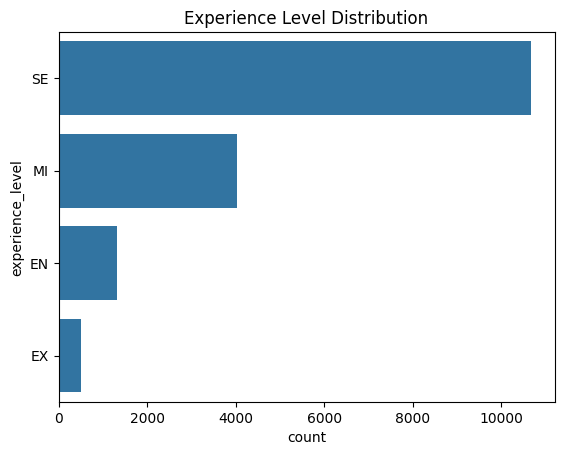

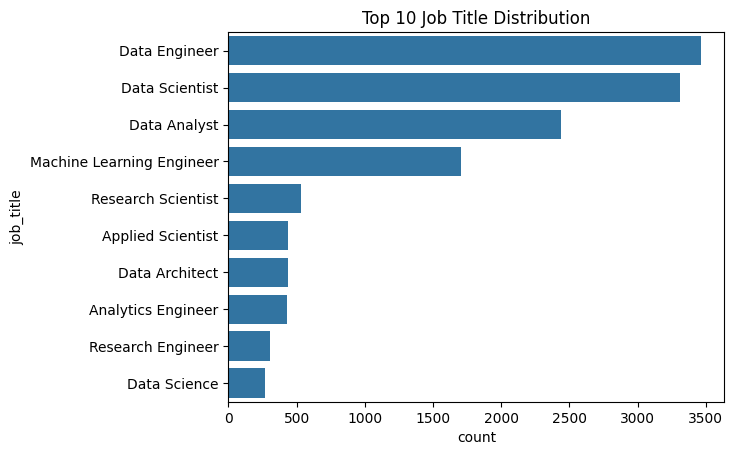

In [4]:
# Count plot for experience level
sns.countplot(y='experience_level', data=data)
plt.title('Experience Level Distribution')
plt.show()

# Get the top 10 most represented job titles
top_10_titles = data['job_title'].value_counts().head(10).index

# Filter the data for these top 10 job titles
filtered_data_top_10 = data[data['job_title'].isin(top_10_titles)]

# Count plot for the top 10 job titles
sns.countplot(y='job_title', data=filtered_data_top_10, order=top_10_titles)
plt.title('Top 10 Job Title Distribution')
plt.show()

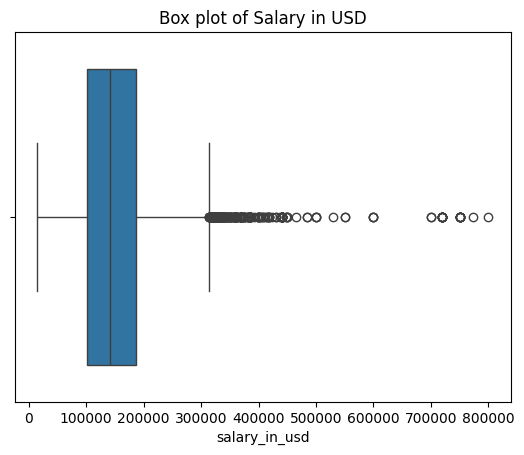

In [5]:
# Box plot for salary in USD
sns.boxplot(x=data['salary_in_usd'])
plt.title('Box plot of Salary in USD')
plt.show()

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.072814       0.078048     -0.200060
salary         -0.072814  1.000000       0.137666      0.021025
salary_in_usd   0.078048  0.137666       1.000000     -0.057289
remote_ratio   -0.200060  0.021025      -0.057289      1.000000


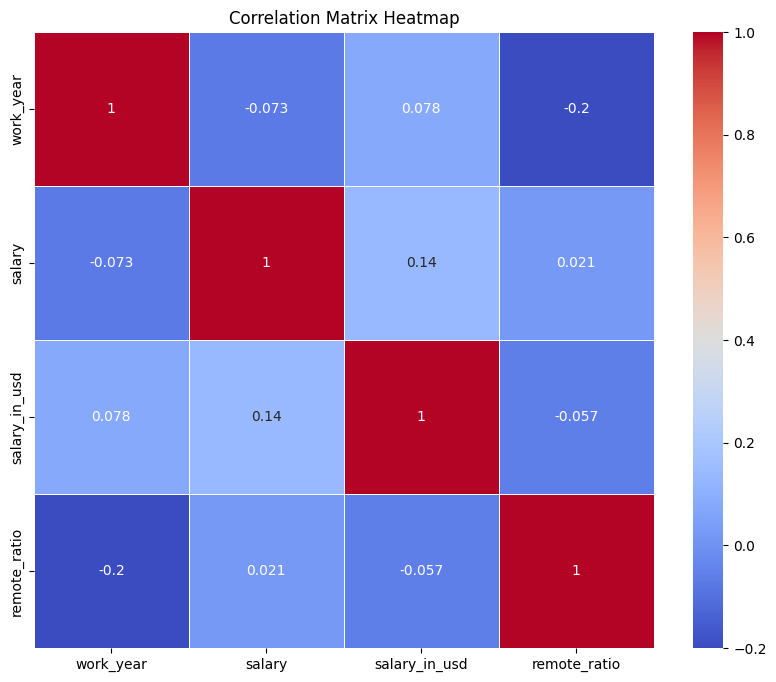

In [6]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation matrix
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

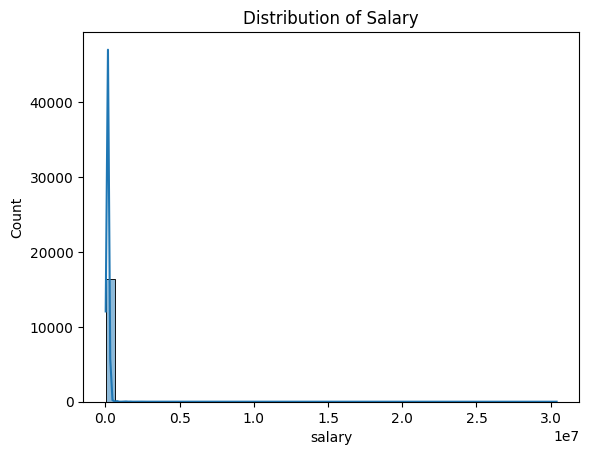

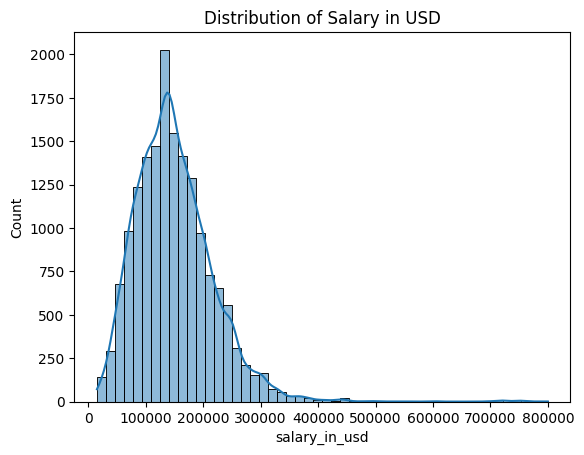

In [7]:
# Distribution plot for salary
sns.histplot(data['salary'], bins=50, kde=True)
plt.title('Distribution of Salary')
plt.show()

# Distribution plot for salary in USD
sns.histplot(data['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salary in USD')
plt.show()

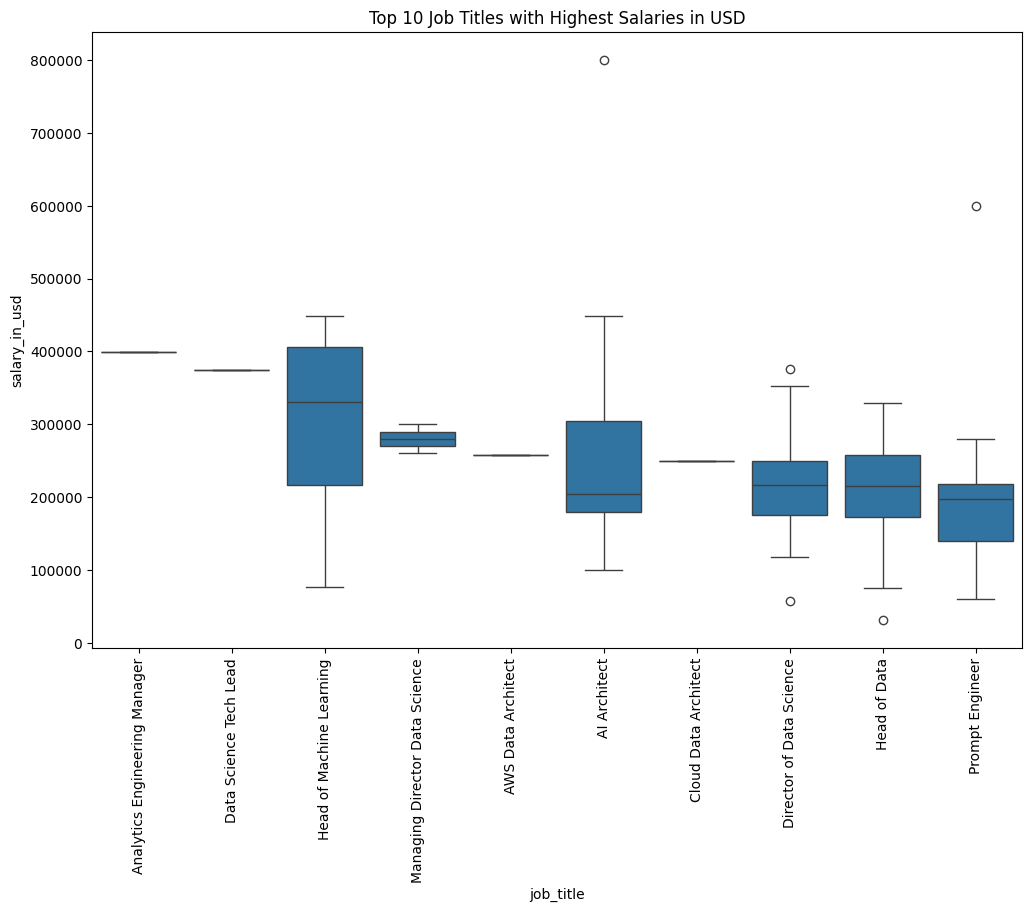

In [8]:
# Calculate the average salary in USD for each job title
avg_salary_by_title = data.groupby('job_title')['salary_in_usd'].mean()

# Get the top 10 job titles with the highest average salary in USD
top_10_highest_salaries = avg_salary_by_title.nlargest(10).index

# Filter the data for these top 10 job titles with the highest salaries
filtered_data_top_salaries = data[data['job_title'].isin(top_10_highest_salaries)]

# Box plot for salary in USD by job title for the top 10 highest salaries
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_data_top_salaries, order=top_10_highest_salaries)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles with Highest Salaries in USD')
plt.show()

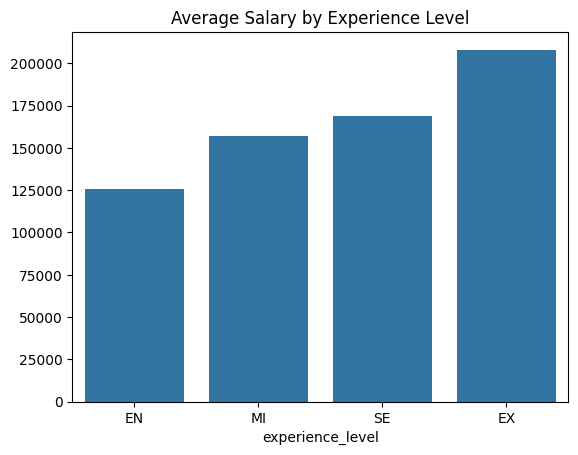

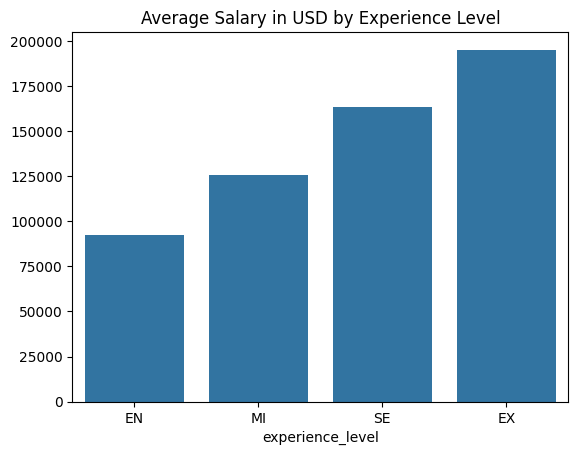

In [9]:
# Bar plot for average salary by experience level
avg_salary_exp_level = data.groupby('experience_level')['salary'].mean().sort_values()
sns.barplot(x=avg_salary_exp_level.index, y=avg_salary_exp_level.values)
plt.title('Average Salary by Experience Level')
plt.show()

# Bar plot for average salary in USD by experience level
avg_salary_usd_exp_level = data.groupby('experience_level')['salary_in_usd'].mean().sort_values()
sns.barplot(x=avg_salary_usd_exp_level.index, y=avg_salary_usd_exp_level.values)
plt.title('Average Salary in USD by Experience Level')
plt.show()

# Preprocessing and splitting into Train/Test set

In [10]:
# Handling missing values (if any)
data = data.dropna()

# Convert categorical features to numerical using OneHotEncoder
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numerical_features = ['remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [11]:
# Splitting the data into train and test sets
X = data.drop(columns=['salary_in_usd', 'salary', 'salary_currency', 'work_year'])
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition

In [12]:
pca__n_components = [5, 10, 15, 25, 50, 60, 75, 80, 100, 150, 250]

# Define advanced models
advanced_models = {
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Define the parameter grids for advanced models
advanced_param_grids = {
    'XGBoost': {
        'pca__n_components': pca__n_components,
        'model__n_estimators': [300],
        'model__learning_rate': [0.05],
        'model__max_depth': [3]
    },
    'LightGBM': {
        'pca__n_components': pca__n_components,
        'model__n_estimators': [300],
        'model__learning_rate': [0.05],
        'model__max_depth': [3],
        'model__verbosity': [-1]
    },
    'CatBoost': {
        'pca__n_components': pca__n_components,
        'model__iterations': [200],
        'model__learning_rate': [0.1],
        'model__depth': [5]
    }
}


# Grid Search

In [13]:
best_estimators_with_pca = {}

# Suppressing the verbose output of GridSearchCV
import logging
logging.basicConfig(level=logging.ERROR)

for model_name, model in advanced_models.items():
    print(f"Performing grid search with PCA for {model_name}...")
    
    # Start timing
    start_time = time.time()
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', PCA()), ('model', model)])
    grid_search = GridSearchCV(pipeline, advanced_param_grids[model_name], cv=5, scoring='r2', n_jobs=-1, error_score=np.nan, verbose=0)
    grid_search.fit(X_train, y_train)
    
    # End timing
    end_time = time.time()
    
    # Calculate elapsed time
    elapsed_time = end_time - start_time
    
    best_estimators_with_pca[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best R2 score for {model_name}: {grid_search.best_score_}")
    print(f"Time taken for grid search for {model_name}: {elapsed_time:.2f} seconds")



Performing grid search with PCA for XGBoost...
Best parameters for XGBoost: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300, 'pca__n_components': 150}
Best R2 score for XGBoost: 0.33061838150024414
Time taken for grid search for XGBoost: 21.03 seconds
Performing grid search with PCA for LightGBM...
Best parameters for LightGBM: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__verbosity': -1, 'pca__n_components': 150}
Best R2 score for LightGBM: 0.33111435589806865
Time taken for grid search for LightGBM: 619.74 seconds
Performing grid search with PCA for CatBoost...
Best parameters for CatBoost: {'model__depth': 5, 'model__iterations': 200, 'model__learning_rate': 0.1, 'pca__n_components': 150}
Best R2 score for CatBoost: 0.3316091500126608
Time taken for grid search for CatBoost: 110.56 seconds


In [14]:
best_estimators_without_pca = {}

# Suppressing the verbose output of GridSearchCV
import logging
logging.basicConfig(level=logging.ERROR)

for model_name, model in advanced_models.items():
    print(f"Performing grid search for {model_name} without PCA...")
    
    # Adjust the parameter grid to remove PCA-related parameters
    param_grid = {k: v for k, v in advanced_param_grids[model_name].items() if 'pca__' not in k}
    
    # Start timing
    start_time = time.time()
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, error_score=np.nan, verbose=0)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        grid_search.fit(X_train, y_train)
    
    # End timing
    end_time = time.time()
    
    # Calculate elapsed time
    elapsed_time = end_time - start_time
    
    best_estimators_without_pca[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name} without PCA: {grid_search.best_params_}")
    print(f"Best R2 score for {model_name} without PCA: {grid_search.best_score_}")
    print(f"Time taken for grid search for {model_name} without PCA: {elapsed_time:.2f} seconds")
    

Performing grid search for XGBoost without PCA...
Best parameters for XGBoost without PCA: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300}
Best R2 score for XGBoost without PCA: 0.3174026131629944
Time taken for grid search for XGBoost without PCA: 0.49 seconds
Performing grid search for LightGBM without PCA...
Best parameters for LightGBM without PCA: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__verbosity': -1}
Best R2 score for LightGBM without PCA: 0.31676236543857345
Time taken for grid search for LightGBM without PCA: 1.72 seconds
Performing grid search for CatBoost without PCA...
Best parameters for CatBoost without PCA: {'model__depth': 5, 'model__iterations': 200, 'model__learning_rate': 0.1}
Best R2 score for CatBoost without PCA: 0.3229232975217335
Time taken for grid search for CatBoost without PCA: 2.54 seconds


These are the result for XGBoost: MSE Score: 3235876131.260864 RMSE Score: 56884.76185465545 R2 Score: 0.32327407598495483 MAE: 40667.64715057548
These are the result for LightGBM: MSE Score: 3242236826.863006 RMSE Score: 56940.64301413364 R2 Score: 0.32194386485152615 MAE: 40741.869236991246
These are the result for CatBoost: MSE Score: 3231489261.1651807 RMSE Score: 56846.18950435623 R2 Score: 0.32419152695903886 MAE: 40584.24843583954
These are the result for XGBoost: MSE Score: 3328339615.51081 RMSE Score: 57691.76384468419 R2 Score: 0.30393707752227783 MAE: 41467.26117591177
These are the result for LightGBM: MSE Score: 3323985670.9058046 RMSE Score: 57654.01695377179 R2 Score: 0.30484754888063326 MAE: 41423.51104430378
These are the result for CatBoost: MSE Score: 3294173594.43547 RMSE Score: 57394.891710286116 R2 Score: 0.31108221415392356 MAE: 41138.2353474757


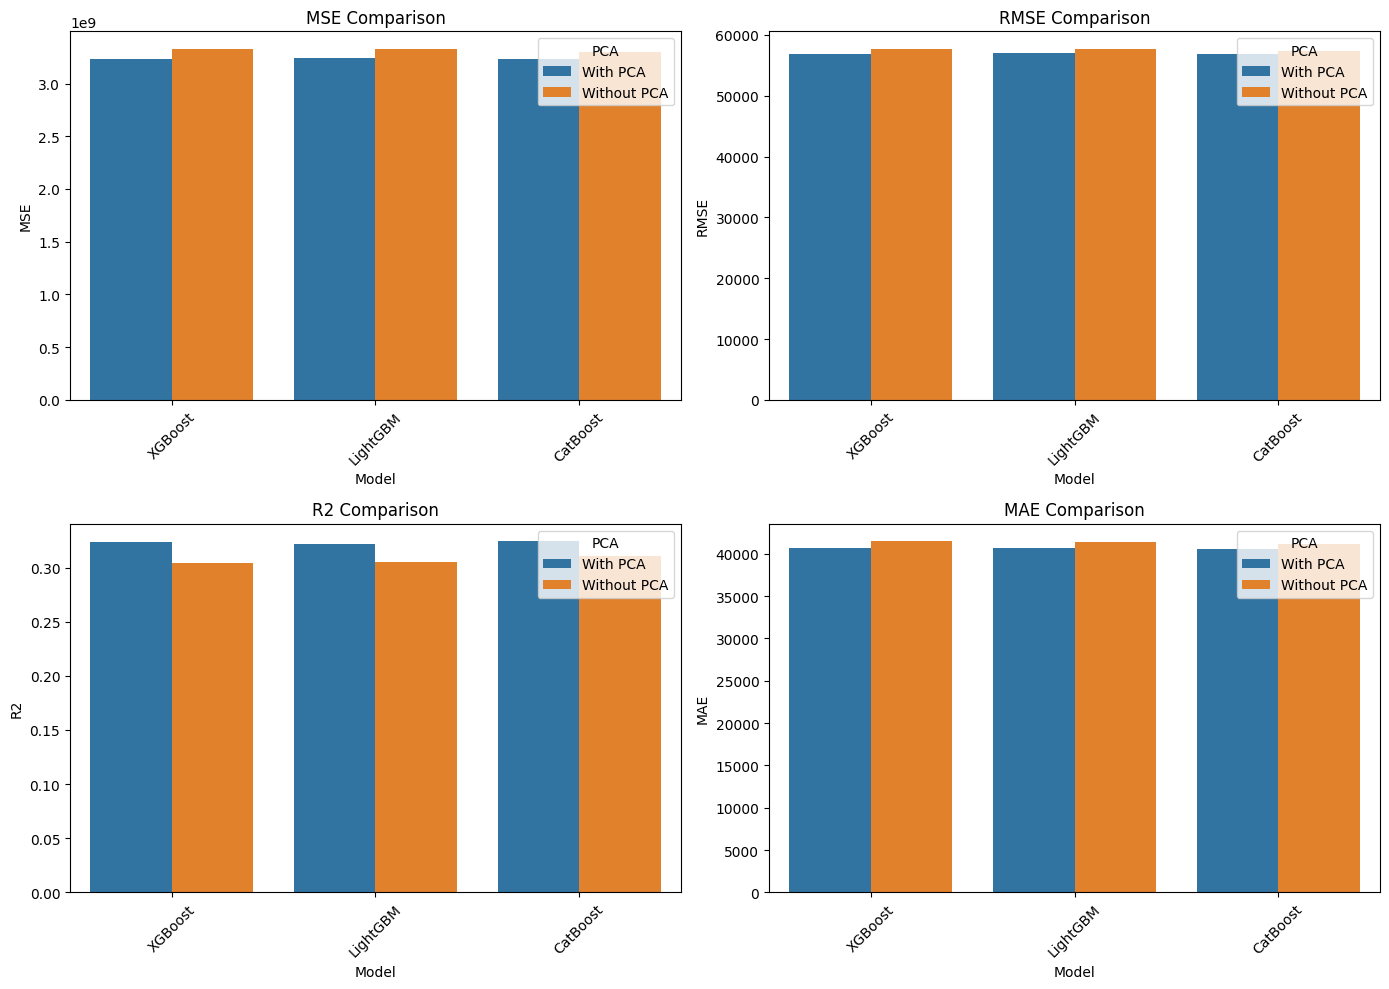

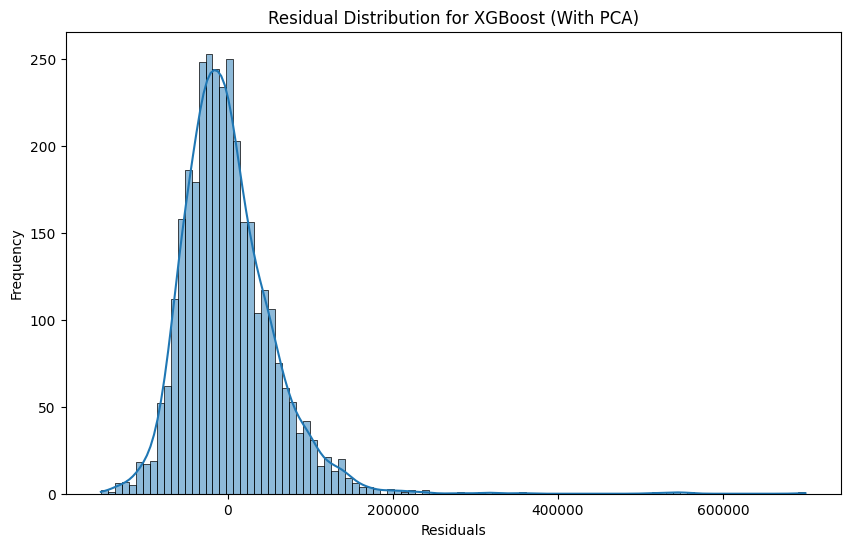

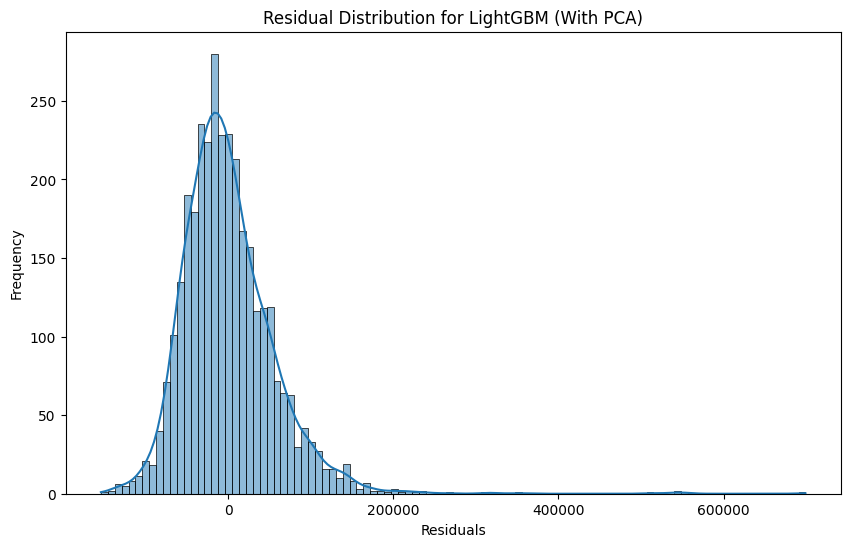

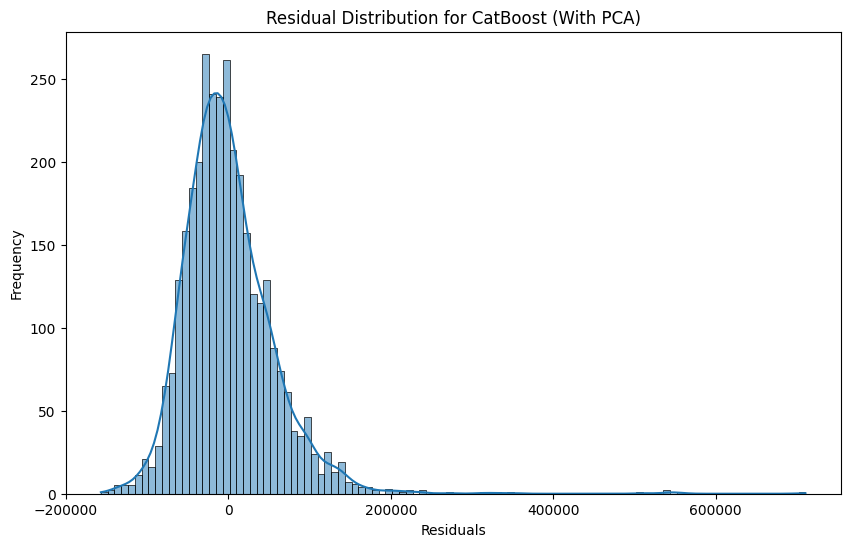

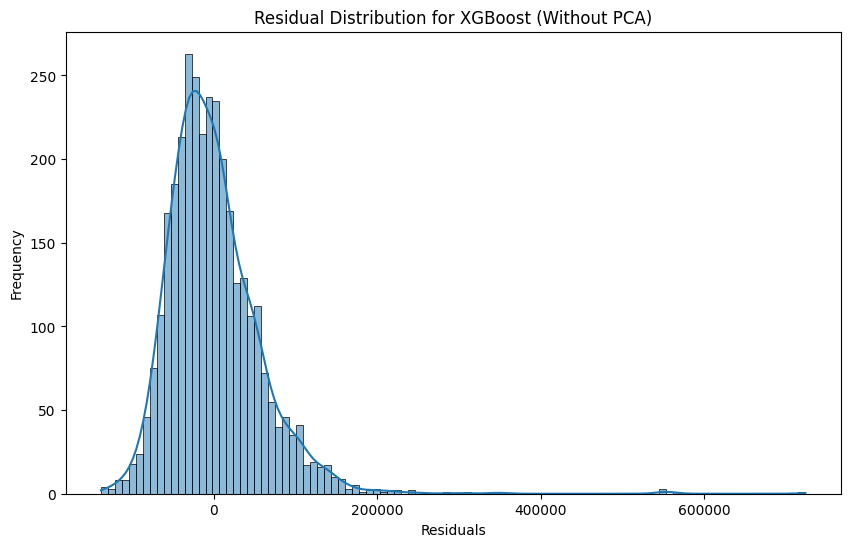

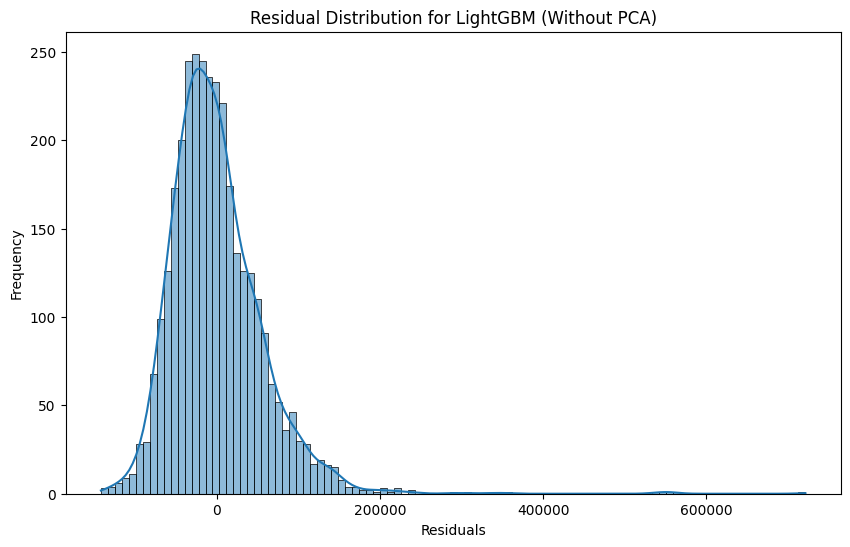

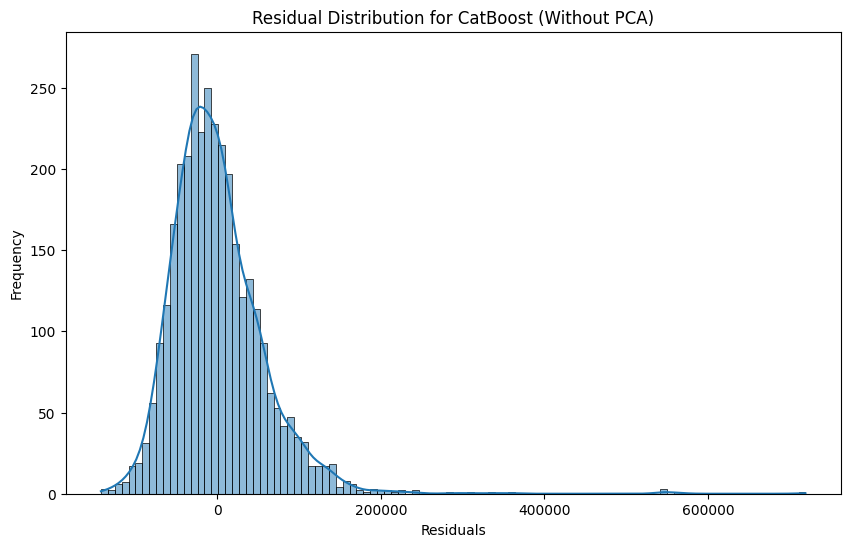

In [15]:
# Function to evaluate models
def evaluate_models(models, X_test, y_test):
    results = []
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        results.append({'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae})
        print(f"These are the result for {model_name}: MSE Score: {mse} RMSE Score: {rmse} R2 Score: {r2} MAE: {mae}")
    return pd.DataFrame(results)

# Evaluate models with PCA
results_with_pca = evaluate_models(best_estimators_with_pca, X_test, y_test)

# Evaluate models without PCA
results_without_pca = evaluate_models(best_estimators_without_pca, X_test, y_test)

# Combine results
results_with_pca['PCA'] = 'With PCA'
results_without_pca['PCA'] = 'Without PCA'
combined_results = pd.concat([results_with_pca, results_without_pca])

# Plotting the results
plt.figure(figsize=(14, 10))

# MSE
plt.subplot(2, 2, 1)
sns.barplot(data=combined_results, x='Model', y='MSE', hue='PCA')
plt.title('MSE Comparison')
plt.xticks(rotation=45)

# RMSE
plt.subplot(2, 2, 2)
sns.barplot(data=combined_results, x='Model', y='RMSE', hue='PCA')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

# R2
plt.subplot(2, 2, 3)
sns.barplot(data=combined_results, x='Model', y='R2', hue='PCA')
plt.title('R2 Comparison')
plt.xticks(rotation=45)

# MAE
plt.subplot(2, 2, 4)
sns.barplot(data=combined_results, x='Model', y='MAE', hue='PCA')
plt.title('MAE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Residual plots for models with PCA
for model_name, model in best_estimators_with_pca.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Distribution for {model_name} (With PCA)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Residual plots for models without PCA
for model_name, model in best_estimators_without_pca.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Distribution for {model_name} (Without PCA)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Stacking Model

In [16]:
# Create the list of estimators
estimators = [(name, model) for name, model in best_estimators_with_pca.items()]

# Define the final estimator
final_estimator = Ridge(alpha=1.0)

# Define the stacking model
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

In [17]:
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('XGBoost',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('num',
                                                                                 StandardScaler(),
                                                                                 ['remote_ratio']),
                                                                                ('cat',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ['experience_level',
                                                                                  'employment_type',
                                                                                  'job_title',
                                                                                  'employee_residence',
                                                                                  'company_location',
                                                                                  'company_size'])])),
                                               ('pca', PCA(n_components=150)),
                                               ('model',
                                                XGBRegre...
                                                ColumnTransformer(transformers=[('num',
                                                                                 StandardScaler(),
                                                                                 ['remote_ratio']),
                                                                                ('cat',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ['experience_level',
                                                                                  'employment_type',
                                                                                  'job_title',
                                                                                  'employee_residence',
                                                                                  'company_location',
                                                                                  'company_size'])])),
                                               ('pca', PCA(n_components=150)),
                                               ('model',
                                                <catboost.core.CatBoostRegressor object at 0x7eb57895ad40>)]))],
                  final_estimator=Ridge())

In [18]:
# Evaluate the stacking regressor
y_pred = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Stacking Regressor: MSE = {mse}, R2 = {r2}, MAE = {mae}")

Stacking Regressor: MSE = 3229542759.0570717, R2 = 0.32459860323599277, MAE = 40586.388431332576


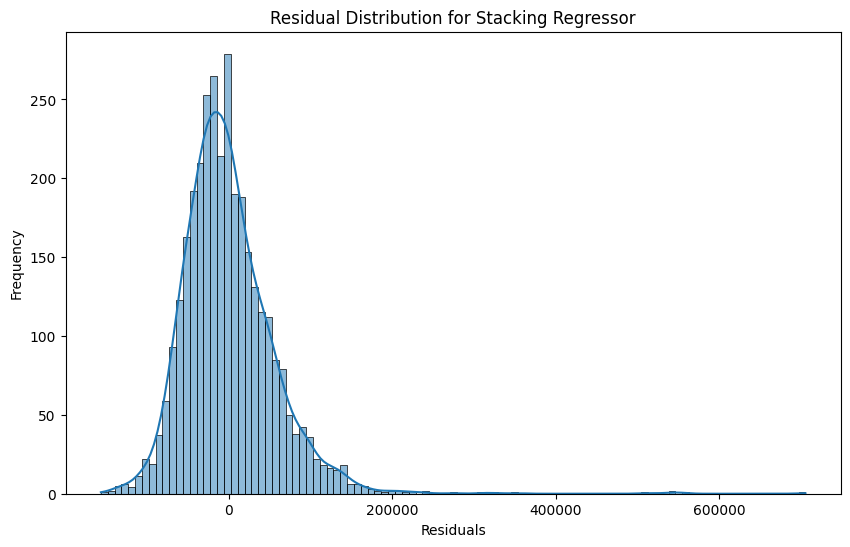

In [19]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title(f'Residual Distribution for Stacking Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Summary of Results

After extensive grid search, employing various machine learning models including Ridge Regression, Random Forest, and Gradient Boosting, the efforts yielded marginal improvements in predicting salary based on experience level and job title. Despite employing advanced techniques such as PCA and Stacking Regression, the R2 score hovered around 0.32, with minimal gains pushing it to 0.325, on the test set. This stagnation suggests that salary prediction depends on factors beyond just experience and job title.

### Analysis

- **Model Performance**: The selected models, including Gradient Boosting and Stacking Regression, represent advanced approaches in machine learning. However, even with these models, the predictive capability for salary remained limited.
  
- **Score Evaluation**: The R2 score, a measure of how well the model predicts the variation in the data, plateaued at approximately 0.32 to 0.325 on the test set. This indicates that the models could only explain about 32% to 32.5% of the variability in salary based on the provided features.
  
- **Real-World Applicability**: Given the modest improvement and the complexity involved, the practical utility of these models in real-life salary prediction scenarios may be questioned. Salary prediction likely involves nuanced factors beyond the scope of this dataset, such as individual negotiation skills, specific job responsibilities, and company-specific compensation practices.

### Conclusion

Despite leveraging sophisticated modeling techniques and extensive parameter tuning through grid search, the predictive accuracy for salary based on experience level and job title remained modest. The findings underscore the challenges in predicting salaries accurately using conventional data features alone, highlighting the need for additional contextual information and features to enhance model performance in real-world applications.